In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('mtcars.csv')

print(df.head())

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


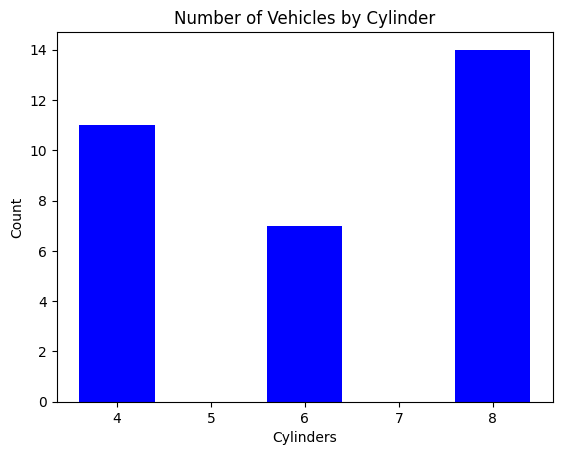

In [15]:
grouped_data = df['cyl'].value_counts()

plt.bar(grouped_data.index, grouped_data.values, color='blue')

plt.title('Number of Vehicles by Cylinder')
plt.xlabel('Cylinders')
plt.ylabel('Count')

plt.show()


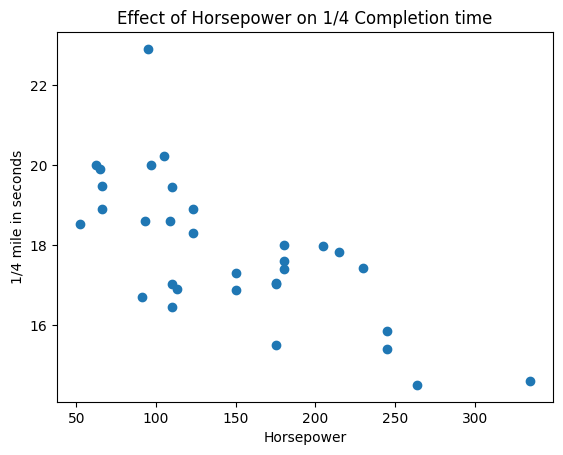

In [16]:
plt.scatter(df['hp'],df['qsec'])

plt.title('Effect of Horsepower on 1/4 Completion time')
plt.xlabel('Horsepower')
plt.ylabel('1/4 mile in seconds')

plt.show()

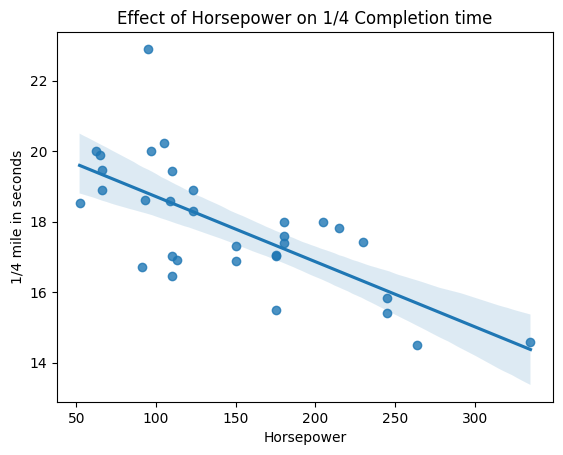

In [17]:
import seaborn as sns

sns.regplot(x=df['hp'], y=df['qsec'])
plt.title('Effect of Horsepower on 1/4 Completion time')
plt.xlabel('Horsepower')
plt.ylabel('1/4 mile in seconds')

plt.show()

In [18]:
import statsmodels.api as sm



/tmp/ipykernel_39525/2251767349.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = result.params[1]
/tmp/ipykernel_39525/2251767349.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = result.params[0]


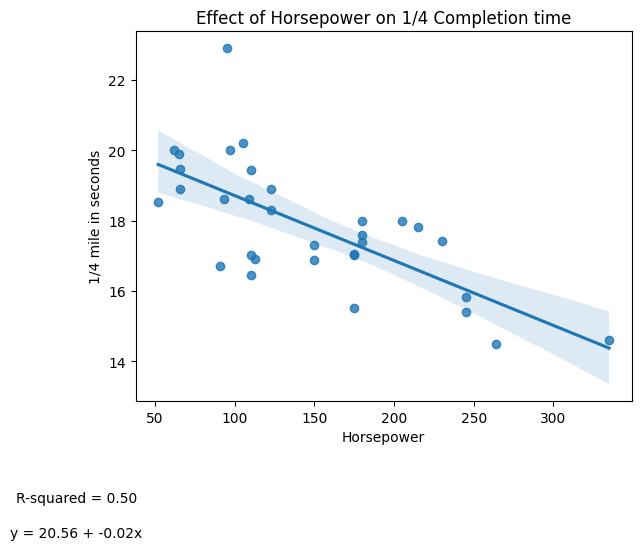

In [19]:
# Calculate linear regression
x_with_intercept = sm.add_constant(df['hp'])
model = sm.OLS(df['qsec'], x_with_intercept)
result = model.fit()
slope = result.params[1]
intercept = result.params[0]
r_squared = result.rsquared

# Create a scatter plot with regression line and confidence interval
sns.regplot(x=df['hp'], y=df['qsec'])

# Add linear regression equation to the plot
equation = f'y = {intercept:.2f} + {slope:.2f}x'
r_squared_text = f'R-squared = {r_squared:.2f}'
plt.text(0.5, 9, equation, ha='center')
plt.text(0.5, 10, r_squared_text, ha='center')

# Customize the plot
plt.title('Effect of Horsepower on 1/4 Completion time')
plt.xlabel('Horsepower')
plt.ylabel('1/4 mile in seconds')

# Display the plot
plt.show()